1. Use logistic regression to predict whether it will rain tomorrow based on today’s weather conditions. Perform necessary data preprocessing such as handling missing values and normalization. Split the dataset into training and testing sets. Train the model and evaluate its performance using accuracy, precision, recall, and F1-score. Finally, plot and interpret the confusion matrix.

C:\Users\adikw\AppData\Local\Temp\ipykernel_16488\1907791860.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Rain'] = df['Rain'].replace(['rain', 'no rain'], [1, 0])


Initial Weights: [2.73791308e-04 9.28317533e-04 6.75982276e-04 4.96047839e-04
 1.27148900e-05 9.92415400e-04]
[[ 1.          0.70213561 -1.58576368  1.45151557 -0.93638355 -0.28772519]
 [ 1.         -0.21118772 -0.87217484  0.96264764  0.21829711  1.29278384]
 [ 1.          0.0271352   0.29689063 -1.70765871  0.01424786  0.40484043]
 ...
 [ 1.          1.62413495 -0.85088745 -1.57450232  0.17123082  1.11494524]
 [ 1.          0.9137726  -1.31478456  0.03328374  1.31194835 -0.73853297]
 [ 1.          0.28773942 -0.66266443  1.08350801  1.38307     0.76455677]]
Initial Cost: 1386.4998009457988
Final Weights are: [-3.62139817 -1.26665286  1.72376729 -0.04988061  1.5824871   0.05391417]
Final Cost: 330.21505203174524


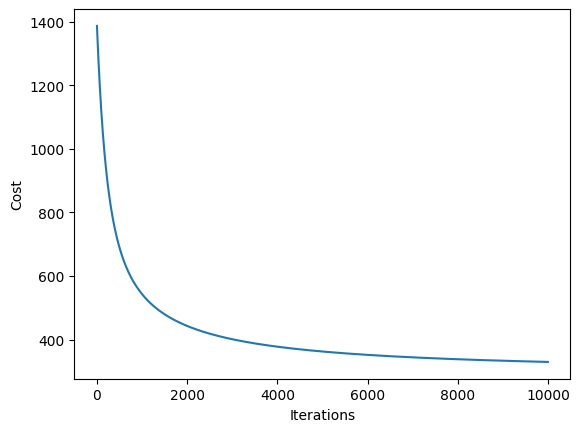

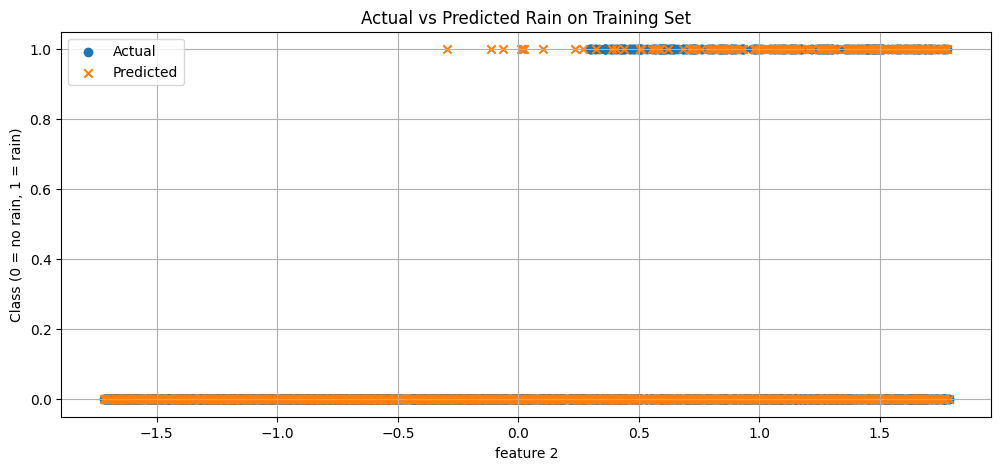

True Positives: 44
True Negatives: 418
False Positives: 14
False Negatives: 24
Precision: 0.7586206895243758
Recall: 0.6470588234342561
F1 Score: 0.6984126933333334
Accuracy:0.924


In [ ]:
import numpy as np
from pandas import *
import matplotlib.pyplot as plt
import math
import pandas as pd

df = pd.read_csv('weather_forecast_data.csv', header=0)

df['Rain'] = df['Rain'].replace(['rain', 'no rain'], [1, 0])
Y = df['Rain'].to_numpy()

def normalize(column):
    return (column - column.mean()) / column.std()

for col in df.columns:
    if col not in ['Rain']:
        df[col] = normalize(df[col])

X = df.drop(columns=['Rain']).to_numpy()
X = np.c_[np.ones(X.shape[0]), X]

w = np.random.rand(X.shape[1]) * 0.001
print('Initial Weights:', w)
#can use sklearn for this as well (train_test_split)

indices = np.arange(X.shape[0])
np.random.seed(42) 
np.random.shuffle(indices)

X_shuffled = X[indices]
Y_shuffled = Y[indices]

split_idx = int(0.8 * X.shape[0])
xtrain = X_shuffled[:split_idx]
xtest = X_shuffled[split_idx:]

ytrain = Y_shuffled[:split_idx]
ytest = Y_shuffled[split_idx:]

print(xtrain)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def hyp(w, X):
    return sigmoid(np.dot(X, w.transpose()))

h = hyp(w, xtrain)

def y(x):
    for i in range(x.shape[0]):
        if x[i] >= 0.5:
            x[i] = 1
        else:
            x[i] = 0
    return x

def cost(w, x, y):
    h = hyp(w, x)
    h = np.clip(h, 1e-8, 1 - 1e-8)
    return np.sum(-y * np.log(h) - (1 - y) * np.log(1 - h)) #binary cross-entropy function

print('Initial Cost:', cost(w, xtrain, ytrain))

def dw(w, x, y):
    return (1 / x.shape[0]) * np.dot((hyp(w, x) - y), x)

alpha = 0.01
ep = 0.001
c = []
ite = []

for i in range(10000):
    c.append(cost(w, xtrain, ytrain))
    ite.append(i)
    w -= alpha * dw(w, xtrain, ytrain)

y_pred_train=y(hyp(w, xtrain))
print('Final Weights are:', w)
print('Final Cost:', cost(w, xtrain, ytrain))

plt.plot(ite, c)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

n=2
plt.figure(figsize=(12, 5))
plt.scatter(xtrain[:,n],ytrain, label='Actual', marker='o')
plt.scatter(xtrain[:,n],y_pred_train, label='Predicted', marker='x')
plt.xlabel(f'feature {n}')
plt.ylabel('Class (0 = no rain, 1 = rain)')
plt.title('Actual vs Predicted Rain on Training Set')
plt.legend()
plt.grid(True)
plt.show()

TP=np.sum((ytest==1) & (y(hyp(w, xtest))==1))
TN=np.sum((ytest==0) & (y(hyp(w, xtest))==0))
FP=np.sum((ytest==0) & (y(hyp(w, xtest))==1))
FN=np.sum((ytest==1) & (y(hyp(w, xtest))==0))

print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

precision = TP / (TP + FP + 1e-8)
recall = TP / (TP + FN + 1e-8)
f1 = 2 * precision * recall / (precision + recall + 1e-8)
accuracy = (TP+TN)/(TP+TN+FP+FN)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print(f"Accuracy:{accuracy}")

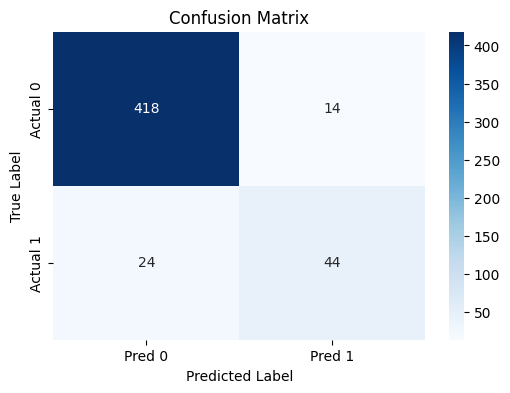

In [28]:
import seaborn as sns


confusion_matrix = np.array([[TN, FP],
                             [FN, TP]])

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Pred 0', 'Pred 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


2.Compute normals for each point in a given 3D point cloud using Principal Component Analysis (PCA). You'll explore how PCA can effectively capture local geometric structures and help derive surface normals by analyzing neighboring points.

In [12]:
import numpy as np

num_points = 1000
radius = 1
height = 2

theta = np.random.uniform(0, 2 * np.pi, num_points)
z = np.random.uniform(-height / 2, height / 2, num_points)

x = radius * np.cos(theta)
y = radius * np.sin(theta)

points = np.column_stack((x, y, z))

np.savetxt('point_cloud.xyz', points)

print("Cylinder point cloud saved as point_cloud.xyz")

Cylinder point cloud saved as point_cloud.xyz


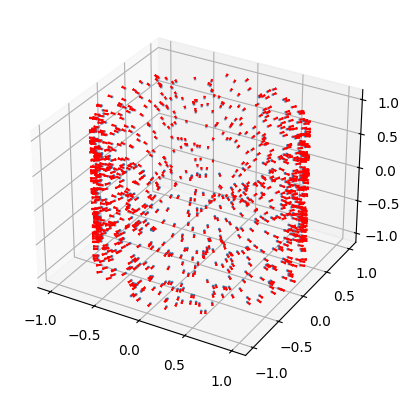

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import KDTree

points = np.loadtxt('point_cloud.xyz')

k = 10
tree = KDTree(points)

normals = []

for i in range(points.shape[0]):
    distances, indices = tree.query(points[i], k=k)
    neighbors = points[indices]

    centroid = np.mean(neighbors, axis=0)
    cov = (neighbors - centroid).T @ (neighbors - centroid)
    
    eigenvalues, eigenvectors = np.linalg.eigh(cov)
    normal = eigenvectors[:, 0] 

    if np.dot(normal, points[i] - centroid) < 0:
        normal = -normal

    normals.append(normal)

normals = np.array(normals)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=1)

scale = 0.05 
ax.quiver(points[:, 0], points[:, 1], points[:, 2], normals[:, 0], normals[:, 1], normals[:, 2], length=scale, color='r')

plt.show()


3. Create  geometric shapes like circle, ellipse, rectangle, square, star. Extract features from them( features may be your choice) and use SVM for shape classification.

Accuracy: 0.41


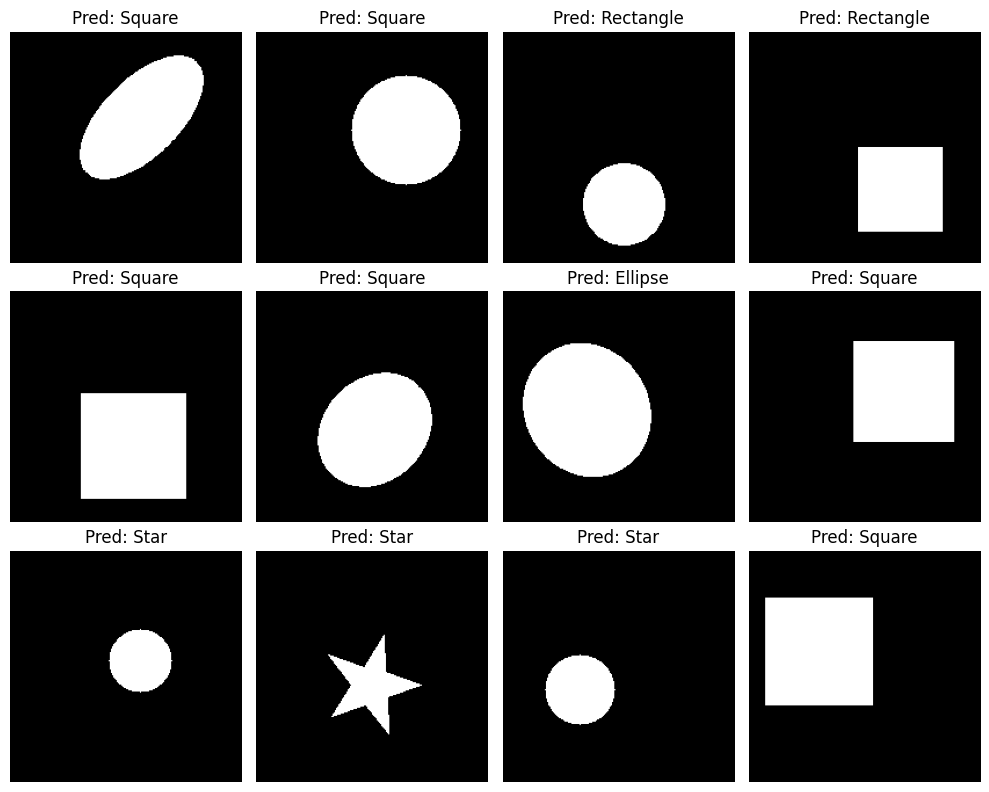

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def generate_shape(shape, size=200):
    img = np.zeros((size, size), dtype=np.uint8)
    center = (np.random.randint(50, size-50), np.random.randint(50, size-50))

    if shape == 'circle':
        radius = np.random.randint(20, 50)
        cv2.circle(img, center, radius, 255, -1)

    elif shape == 'square':
        side = np.random.randint(60, 100)
        top_left = (center[0] - side//2, center[1] - side//2)
        bottom_right = (center[0] + side//2, center[1] + side//2)
        cv2.rectangle(img, top_left, bottom_right, 255, -1)

    elif shape == 'rectangle':
        w = np.random.randint(60, 120)
        h = np.random.randint(30, 80)
        top_left = (center[0] - w//2, center[1] - h//2)
        bottom_right = (center[0] + w//2, center[1] + h//2)
        cv2.rectangle(img, top_left, bottom_right, 255, -1)

    elif shape == 'ellipse':
        axes = (np.random.randint(30, 70), np.random.randint(20, 60))
        angle = np.random.randint(0, 180)
        cv2.ellipse(img, center, axes, angle, 0, 360, 255, -1)

    elif shape == 'star':
        base_points = np.array([
            [0, -40], [10, -10], [40, -10], [15, 10],
            [25, 40], [0, 20], [-25, 40], [-15, 10],
            [-40, -10], [-10, -10]
        ])
        angle = np.random.uniform(0, 2*np.pi)
        scale = np.random.uniform(0.8, 1.2)
        rotation_matrix = np.array([
            [np.cos(angle), -np.sin(angle)],
            [np.sin(angle), np.cos(angle)]
        ])
        rotated = np.dot(base_points * scale, rotation_matrix).astype(np.int32)
        translated = rotated + np.array(center)
        cv2.fillPoly(img, [translated], 255)
    return img

# Feature Extraction
def extract_features(img):
    contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnt = contours[0]

    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt, True)
    x, y, w, h = cv2.boundingRect(cnt)
    aspect_ratio = float(w) / h
    circularity = 4 * np.pi * area / (perimeter * perimeter)
    hu_moments = cv2.HuMoments(cv2.moments(cnt)).flatten()

    features = [area, perimeter, aspect_ratio, circularity]
    features.extend(hu_moments)
    return features

# Dataset Generation
shapes = ['circle', 'square', 'rectangle', 'ellipse', 'star']
X = []
Y = []
images = []  # Store images for visualization

for label, shape in enumerate(shapes):
    for i in range(100):
        img = generate_shape(shape)
        features = extract_features(img)
        X.append(features)
        Y.append(label)
        images.append(img)

X = np.array(X)
Y = np.array(Y)


X_train, X_test, Y_train, Y_test, images_train, images_test = train_test_split(
    X, Y, images, test_size=0.2, random_state=42)


model = SVC()
model.fit(X_train, Y_train)


Y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, Y_pred))

# Visualization
shape_names = ['Circle', 'Square', 'Rectangle', 'Ellipse', 'Star']

plt.figure(figsize=(10, 8))
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(images_test[i], cmap='gray')
    plt.title(f"Pred: {shape_names[Y_pred[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
